*   Nama : **Virgiawan Teguh Kusuma**
*   Email : **181240000833@unisnu.ac.id**
*   Domisili : **Kabupaten Jepara, Jawa Tengah**

In [2]:
# import drive dan load google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import zipfile dan os
import zipfile, os

# extract file masker.zip
maskerZip = '/content/drive/MyDrive/masker2.zip'
maskerZipRef = zipfile.ZipFile(maskerZip, 'r')
maskerZipRef.extractall('/content')
maskerZipRef.close()

In [4]:
# list directory
os.listdir('/content/Dataset')

['mask_weared_incorrect', 'with_mask', 'without_mask']

In [5]:
# inisialisasi path test, train, validation dll
basePath = '/content/Dataset'
result = '/content/Dataset/result'
testPath = '/content/Dataset/result/test'
trainPath = '/content/Dataset/result/train'
valPath = '/content/Dataset/result/val'

In [6]:
# install, import splitfolders dan train_test_split
!pip install split-folders
import splitfolders
from sklearn.model_selection import train_test_split

# split folder
splitfolders.ratio(basePath, 
                   output=result, 
                   seed=1337, 
                   ratio=(.8, .2), 
                   group_prefix=None)

Copying files: 8982 files [00:01, 4950.61 files/s]


In [7]:
# import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# augmentasi gambar dengan ImageDataGenerator
trainDataGenerator = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
    fill_mode= 'nearest'
    )

In [8]:
# train dan validation untuk ImageDataGenerator
trainGenerator = trainDataGenerator.flow_from_directory(
    trainPath,
    target_size=(64,64),
    batch_size=8,
    class_mode='categorical',
    subset='training'
    )

valGenerator = trainDataGenerator.flow_from_directory(
    trainPath,
    target_size=(64,64),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
    )

Found 5748 images belonging to 3 classes.
Found 1437 images belonging to 3 classes.


In [9]:
print(trainGenerator.class_indices)

{'mask_weared_incorrect': 0, 'with_mask': 1, 'without_mask': 2}


In [10]:
# model sequential
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [15]:
# import keras
from tensorflow import keras

# menggunakan callback agar pengujian berhenti jika mae mencapai target
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4)

In [16]:
# compile model
model.compile(loss='categorical_crossentropy', 
              optimizer=tf.optimizers.Adam(), 
              metrics=['accuracy']
              )

In [17]:
# train model dengan fit
history = model.fit(trainGenerator,
                    validation_data=valGenerator,
                    steps_per_epoch=25,
                    epochs=20, 
                    verbose=2,
                    batch_size=128,
                    callbacks=[callback]
                    )

Epoch 1/20
25/25 - 8s - loss: 0.3446 - accuracy: 0.8950 - val_loss: 0.2807 - val_accuracy: 0.8935
Epoch 2/20
25/25 - 7s - loss: 0.4589 - accuracy: 0.8350 - val_loss: 0.2778 - val_accuracy: 0.8880
Epoch 3/20
25/25 - 7s - loss: 0.2722 - accuracy: 0.8750 - val_loss: 0.4003 - val_accuracy: 0.8323
Epoch 4/20
25/25 - 7s - loss: 0.3146 - accuracy: 0.8800 - val_loss: 0.3493 - val_accuracy: 0.8608
Epoch 5/20
25/25 - 7s - loss: 0.3311 - accuracy: 0.9050 - val_loss: 0.2518 - val_accuracy: 0.9047
Epoch 6/20
25/25 - 7s - loss: 0.2803 - accuracy: 0.8950 - val_loss: 0.2459 - val_accuracy: 0.9137
Epoch 7/20
25/25 - 7s - loss: 0.2343 - accuracy: 0.9150 - val_loss: 0.3165 - val_accuracy: 0.8998
Epoch 8/20
25/25 - 7s - loss: 0.3273 - accuracy: 0.8800 - val_loss: 0.2580 - val_accuracy: 0.9047
Epoch 9/20
25/25 - 7s - loss: 0.2712 - accuracy: 0.8900 - val_loss: 0.2421 - val_accuracy: 0.9151
Epoch 10/20
25/25 - 7s - loss: 0.3692 - accuracy: 0.8950 - val_loss: 0.2552 - val_accuracy: 0.9144
Epoch 11/20
25/25 -

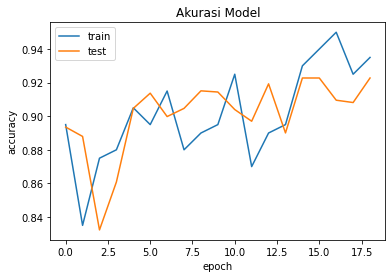

In [18]:
# import pyplot
import matplotlib.pyplot as plt

# plot akurasi model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

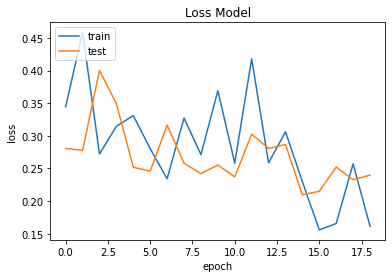

In [19]:
# plot loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

Saving b51f0b40-8442-11ea-bff5-fbedb30a8e06.png to b51f0b40-8442-11ea-bff5-fbedb30a8e06.png
b51f0b40-8442-11ea-bff5-fbedb30a8e06.png
[2]
[[0. 0. 1.]]
Tidak Pakai Masker


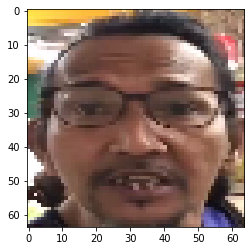

In [24]:
# memprediksi dan load gambar
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import matplotlib.image as mpimg
from google.colab import files
import numpy as np

%matplotlib inline

uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(64, 64))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  predIdxs = np.argmax(classes, axis=1)
  
  print(fn)
  print(predIdxs)
  print(classes)
  if classes[0][1]>0:
    print('Pakai Masker')
  elif classes[0][2]>0:
    print('Tidak Pakai Masker')
  else:
    print('Tidak Pakai Masker dengan Benar')


In [25]:
# konversi model TFLiteConverter
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp0in5b6tb/assets


INFO:tensorflow:Assets written to: /tmp/tmp0in5b6tb/assets


In [26]:
# simpan model dengan format .tflite
with tf.io.gfile.GFile('masker.tflite', 'wb') as f:
  f.write(tflite_model)